In [2]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
#Importar el Dataset

dataset = np.load("/Users/diegoalvarez/Documents/Maestria/Python/Proyecto/proyecto_training_data.npy")

In [44]:
SalePrice = dataset[:, 0]
OverallQual = dataset[:, 1]
FstFlrSF = dataset[:, 2]
TotRmsAbvGrd = dataset[:, 3]
YearBuilt = dataset[:, 4]
LotFrontage = dataset[:, 5]
print(SalePrice)
print(OverallQual)
print(FstFlrSF)
print(TotRmsAbvGrd)
print(YearBuilt)
print(LotFrontage)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[7. 6. 7. ... 7. 5. 5.]
[ 856. 1262.  920. ... 1188. 1078. 1256.]
[8. 6. 6. ... 9. 5. 6.]
[2003. 1976. 2001. ... 1941. 1950. 1965.]
[65. 80. 68. ... 66. 68. 75.]


In [45]:
dataframe = {'SalePrice': (SalePrice),
                 'OverallQual': (OverallQual),
                 'FstFlrSF': (FstFlrSF),
                 'TotRmsAbvGrd': (TotRmsAbvGrd),
                 'YearBuilt': (YearBuilt),
                 'LotFrontage': (LotFrontage)
            }
df1 = pd.DataFrame(dataframe)
df1            

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [46]:
tamano_total = len(dataset)
porcentaje_entrenamiento = 0.8

#Calcular el índice para dividir datos
indice_div = int(tamano_total * porcentaje_entrenamiento)

#Dividir los datos en conjunto de entrenamiento y testing
datos_entren = dataset[:indice_div, :]
datos_val = dataset[indice_div:, :]

In [47]:
print("Dimensiones del conjunto de entrenamiento:", datos_entren.shape)
print("Dimensiones del conjunto de validación/pruebas:", datos_val.shape)

Dimensiones del conjunto de entrenamiento: (1168, 6)
Dimensiones del conjunto de validación/pruebas: (292, 6)


In [58]:
#Análisis Exploratorio de datos

sm = np.mean(SalePrice)
smx = np.max(SalePrice)
smn = np.min(SalePrice)
sp = np.ptp(SalePrice)
sd = np.std(SalePrice)
print('SalePrice:','\n''Media:', sm,'\n''Máximo:', smx,'\n''Mínimo:', smn,'\n''Rango:', sp,'\n''Desviación:', sd)
print('--------------------------')
print()
om = np.mean(OverallQual)
omx = np.max(OverallQual)
omn = np.min(OverallQual)
op = np.ptp(OverallQual)
od = np.std(OverallQual)
print('OverallQual:','\n''Media:', om,'\n''Máximo:', omx,'\n''Mínimo:', omn,'\n''Rango:', op,'\n''Desviación:', od)
print('--------------------------')
print()
fm = np.mean(FstFlrSF)
fmx = np.max(FstFlrSF)
fmn = np.min(FstFlrSF)
fp = np.ptp(FstFlrSF)
fd = np.std(FstFlrSF)
print('FstFlrSF:','\n''Media:', fm,'\n''Máximo:', fmx,'\n''Mínimo:', fmn,'\n''Rango:', fp,'\n''Desviación:', fd)
print('--------------------------')
print()
tm = np.mean(TotRmsAbvGrd)
tmx = np.max(TotRmsAbvGrd)
tmn = np.min(TotRmsAbvGrd)
tp = np.ptp(TotRmsAbvGrd)
td = np.std(TotRmsAbvGrd)
print('TotRmsAbvGrd','\n''Media:', tm,'\n''Máximo:', tmx,'\n''Mínimo:', tmn,'\n''Rango:', tp,'\n''Desviación:', td)
print('--------------------------')
print()
ym = np.mean(YearBuilt)
ymx = np.max(YearBuilt)
ymn = np.min(YearBuilt)
yp = np.ptp(YearBuilt)
yd = np.std(YearBuilt)
print('YearBuilt:','\n''Media:', ym,'\n''Máximo:', ymx,'\n''Mínimo:', ymn,'\n''Rango:', yp,'\n''Desviación:', yd)
print('--------------------------')
print()
lm = np.nanmean(LotFrontage)
lmx = np.nanmax(LotFrontage)
lmn = np.nanmin(LotFrontage)
lp = np.nanmax(LotFrontage) - np.nanmin(LotFrontage)
ld = np.nanstd(LotFrontage)
print('LotFrontage:','\n''Media:', lm,'\n''Máximo:', lmx,'\n''Mínimo:', lmn,'\n''Rango:', lp,'\n''Desviación:', ld)

SalePrice: 
Media: 180921.19589041095 
Máximo: 755000.0 
Mínimo: 34900.0 
Rango: 720100.0 
Desviación: 79415.29188606751
--------------------------

OverallQual: 
Media: 6.0993150684931505 
Máximo: 10.0 
Mínimo: 1.0 
Rango: 9.0 
Desviación: 1.3825228366585953
--------------------------

FstFlrSF: 
Media: 1162.626712328767 
Máximo: 4692.0 
Mínimo: 334.0 
Rango: 4358.0 
Desviación: 386.45532230228963
--------------------------

TotRmsAbvGrd 
Media: 6.517808219178082 
Máximo: 14.0 
Mínimo: 2.0 
Rango: 12.0 
Desviación: 1.624836553698191
--------------------------

YearBuilt: 
Media: 1971.267808219178 
Máximo: 2010.0 
Mínimo: 1872.0 
Rango: 138.0 
Desviación: 30.192558810489448
--------------------------

LotFrontage: 
Media: 70.04995836802665 
Máximo: 313.0 
Mínimo: 21.0 
Rango: 292.0 
Desviación: 24.27463944767604


/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


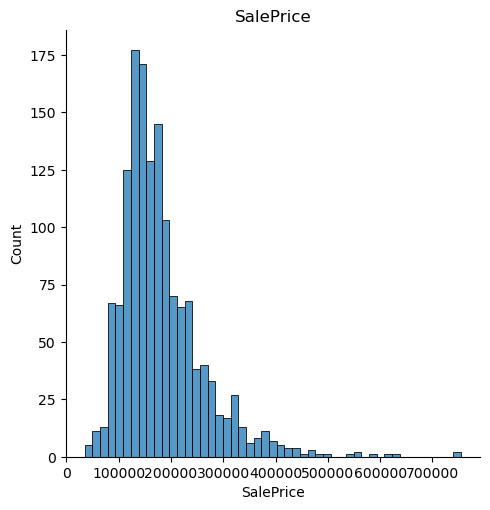

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


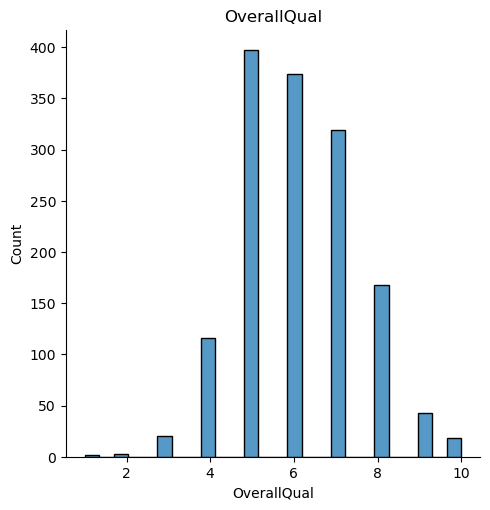

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


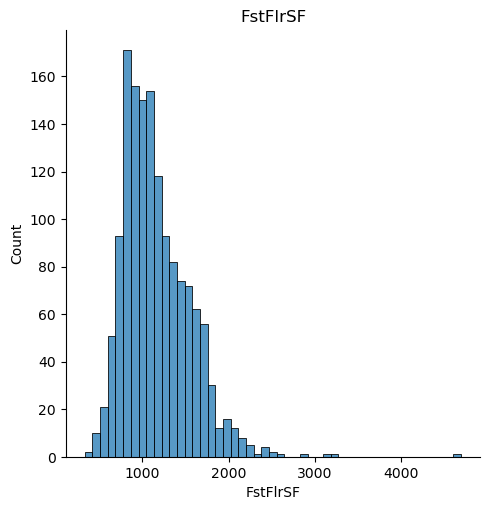

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


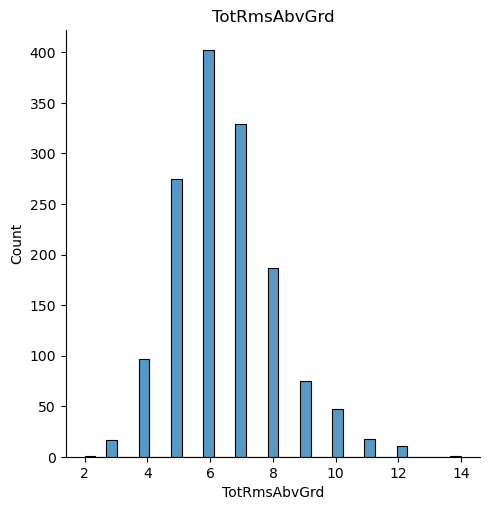

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


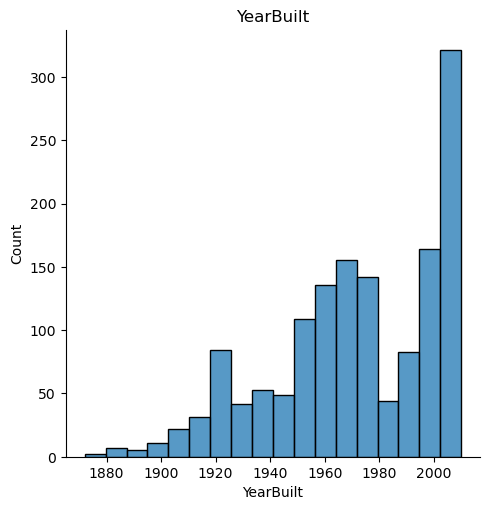

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


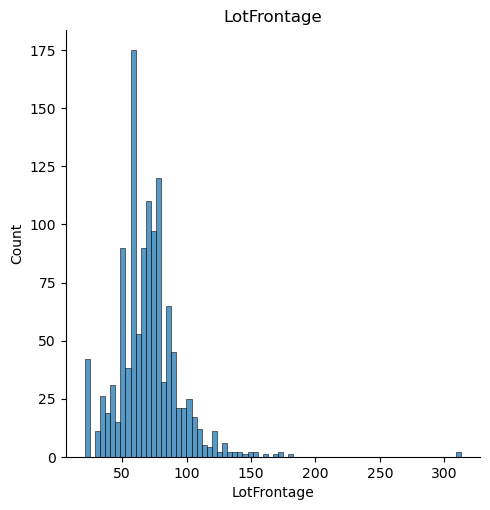

In [65]:
#Histogramas de Variables

gfs = sns.displot(df1['SalePrice'])
gfs.set(title='SalePrice')
plt.show()
print()
gfs = sns.displot(df1['OverallQual'])
gfs.set(title='OverallQual')
plt.show()
print()
gfs = sns.displot(df1['FstFlrSF'])
gfs.set(title='FstFlrSF')
plt.show()
print()
gfs = sns.displot(df1['TotRmsAbvGrd'])
gfs.set(title='TotRmsAbvGrd')
plt.show()
print()
gfs = sns.displot(df1['YearBuilt'])
gfs.set(title='YearBuilt')
plt.show()
print()
gfs = sns.displot(df1['LotFrontage'])
gfs.set(title='LotFrontage')
plt.show()